In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import python_code.Scripts as sc
import python_code.Reference as ref

In [2]:
snap07 = pd.read_spss('./data/qc_pub_fy2007.sav')

In [3]:
snap07.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
snap07.shape

(47469, 769)

In [5]:
snap07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47469 entries, 0 to 47468
Columns: 769 entries, FSAFIL1 to NDISCA16
dtypes: float64(769)
memory usage: 278.5 MB


In [6]:
snap07.isnull().sum()

FSAFIL1         0
FSAFIL2     20739
FSAFIL3     29470
FSAFIL4     36884
FSAFIL5     42301
            ...  
NDISCA12    47455
NDISCA13    47463
NDISCA14    47466
NDISCA15    47469
NDISCA16    47469
Length: 769, dtype: int64

## *2017 Data*

In [7]:
snap17 = pd.read_csv('./data/qc_pub_fy2017.csv')

In [8]:
snap17.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID,STATENAME
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,Connecticut
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,Connecticut
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,Connecticut
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,Connecticut
4,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Connecticut


In [9]:
snap17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45530 entries, 0 to 45529
Columns: 814 entries, FSAFIL1 to STATENAME
dtypes: float64(368), int64(445), object(1)
memory usage: 282.8+ MB


In [10]:
snap17.isnull().sum()

FSAFIL1          0
FSAFIL2      22368
FSAFIL3      30458
FSAFIL4      36350
FSAFIL5      40801
             ...  
FSNONCIT         0
FSDIS            0
FSELDER          0
FSKID            0
STATENAME        0
Length: 814, dtype: int64

## *Target Variable* (what we will be predicting = Y variable)

In [11]:
# 2007: 1 = Eligible, 2 = Not eligible
snap07['CAT_ELIG'].value_counts()

CAT_ELIG
2.0    25134
1.0    22335
Name: count, dtype: int64

In [12]:
# 2017: 0 = Not eligible, 1 = Reported eligible, 2= Recorded eligible
snap17['CAT_ELIG'].value_counts()

CAT_ELIG
1    36223
0     7012
2     2295
Name: count, dtype: int64

#### **Observations:** I am going to change the target variable in both datasets to a dictionary of:
- 0 = Not Eligible
- 1 = Eligible

In [13]:
snap07['CAT_ELIG'] = snap07['CAT_ELIG'].replace(2,0)
snap17['CAT_ELIG'] = snap17['CAT_ELIG'].replace(2,1)

In [14]:
snap07['CAT_ELIG'].value_counts()

CAT_ELIG
0.0    25134
1.0    22335
Name: count, dtype: int64

In [15]:
snap17['CAT_ELIG'].value_counts()

CAT_ELIG
1    38518
0     7012
Name: count, dtype: int64

In [16]:
print(f'2017 dataset: {snap17.shape} VS 2007 dataset: {snap07.shape}')

2017 dataset: (45530, 814) VS 2007 dataset: (47469, 769)


#### **Observations:** Less people nationally applied for SNAP benefits in 2017 as opposed to 2007. This probably had to do with stronger national economic factors such as employment opportunities. Also, 45 columns of features were added to the dataset.

## *Reference Tables*

In [17]:
import python_code.Reference as ref
print(f'Unit Demo, 2007 is {ref.unit07_demo.shape[0]} and 2017 is {ref.unit17_demo.shape[0]}')
print(f'Unit Assets, 2007 is {ref.unit07_assets.shape[0]} and 2017 is {ref.unit17_assets.shape[0]}')
print(f'Unit ExDed, 2007 is {ref.unit07_exded.shape[0]} and 2017 is {ref.unit17_exded.shape[0]}')
print(f'Unit Inc, 2007 is {ref.unit07_inc.shape[0]} and 2017 is {ref.unit17_inc.shape[0]}')
print(f'Pers Char, 2007 is {ref.per07_char.shape[0]} and 2017 is {ref.per17_char.shape[0]}')
print(f'Pers Inc, 2007 is {ref.per07_inc.shape[0]} and 2017 is {ref.per17_inc.shape[0]}')

Unit Demo, 2007 is 22 and 2017 is 31
Unit Assets, 2007 is 7 and 2017 is 11
Unit ExDed, 2007 is 27 and 2017 is 27
Unit Inc, 2007 is 26 and 2017 is 27
Pers Char, 2007 is 14 and 2017 is 17
Pers Inc, 2007 is 20 and 2017 is 21


#### **Observations:** From 2007 to 2017, every category obtained more columns except for Expenses and Deductables.

# Extracting State Data

## *New Mexico*

In [18]:
#save New Mexico records
#import pandas as pd
#snap07 = pd.read_spss('./data/qc_pub_fy2007.sav')
nm07 = snap07.loc[snap07['STATE'] == 35].astype('float64')
nm07_target = nm07['CAT_ELIG']
nm07.to_csv('./data/nm07.csv',index=None)

In [19]:
#snap17 = pd.read_csv('./data/qc_pub_fy2017.csv')
nm17 = snap17.loc[snap17['STATE'] == 35]
nm17_target = nm17['CAT_ELIG']
nm17 = nm17.drop(columns = ['STATENAME'])
nm17 = nm17.astype('float64')
nm17.to_csv('./data/nm17.csv',index=None)

In [20]:
#New Mexico dataframe
df_nm07 = pd.read_csv('./data/nm07.csv')
df_nm07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#New Mexico dataframe
df_nm17 = pd.read_csv('./data/nm17.csv')
df_nm17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
962,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [22]:
df_nm07['CAT_ELIG'].value_counts()

CAT_ELIG
0.0    813
1.0    442
Name: count, dtype: int64

In [23]:
df_nm17['CAT_ELIG'].value_counts()

CAT_ELIG
1.0    964
Name: count, dtype: int64

## *Nebraska*

In [24]:
# Save Nebrasks records
ne07 = snap07.loc[snap07['STATE'] == 31].astype('float64')
ne07_target = ne07['CAT_ELIG']
ne07.to_csv('./data/ne07.csv',index=None)

In [25]:
ne17 = snap17.loc[snap17['STATE'] == 31]
ne17_target = ne17['CAT_ELIG']
ne17 = ne17.drop(columns = ['STATENAME'])
ne17 = ne17.astype('float64')
ne17.to_csv('./data/ne17.csv',index=None)

In [26]:
#Nebraska dataframe
df_ne07 = pd.read_csv('./data/ne07.csv')
df_ne07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_ne17 = pd.read_csv('./data/ne17.csv')
df_ne17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
891,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
892,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


In [28]:
df_ne07['CAT_ELIG'].value_counts()

CAT_ELIG
0.0    505
1.0    286
Name: count, dtype: int64

In [29]:
df_ne17['CAT_ELIG'].value_counts()

CAT_ELIG
1.0    894
Name: count, dtype: int64

#### **Observations:** 
We can see there are 1255 people who applied for SNAP in New Mexico, opposed to 791 applications in Nebraska in 2007.

There were significantly more people in both states (Nebraska: 894, New Mexico: 964) on SNAP in 2017. Due to a dramatic change, I suspect that it was due to more being eligible because of a change in qualifications.

# Initial Snapshots of the Data

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

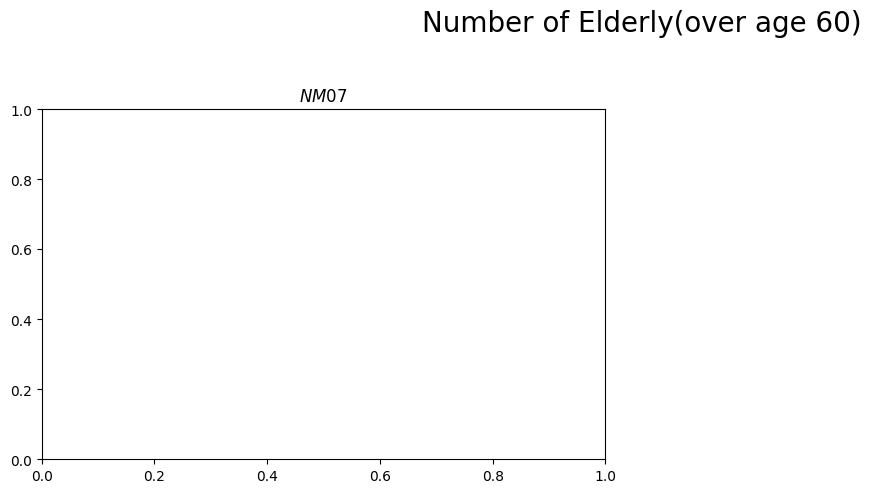

In [30]:
sc.plot_simple_features('FSNELDER','elderly',"Number of Elderly(over age 60)")

In [ ]:
#single-female head of household - FSNGMOM
sc.plot_simple_features('FSNGMOM','single_mom',"Number of Single Mom as Head of Household")

In [ ]:
#number of children - FSNKID
sc.plot_simple_features('FSNKID','no_children',"Number of Children over 5")

In [ ]:
#number of children under 5 = FSNK5T17
sc.plot_simple_features('FSNK5T17','no_toddler',"Number of Children under 5")

In [ ]:
#number of noncitizens in unit = FSNONCIT
sc.plot_simple_features('FSNONCIT','non_citiz',"Number of Non-Citizens")

# Null Values

This will be a long section dedicated to an initial reduction of columns by different treatments of null values.

## *Full Missing values*

There are many columns that have no data in them at all, we will remove those.

***New Mexico***

In [ ]:
with pd.option_context('display.max_rows', None):
    print(df_nm07.isnull().sum().sort_values(ascending=False)[:96])

In [ ]:
#Remove those columns.
first_cut = df_nm07.isnull().sum().sort_values(ascending=False)[:96]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#remove them
nm07 = df_nm07.drop(fc_list,axis=1)
nm07

In [ ]:
with pd.option_context('display.max_rows', None):
    print(df_nm17.isnull().sum().sort_values(ascending=False)[:165])

In [ ]:
#Remove those columns.
first_cut = df_nm17.isnull().sum().sort_values(ascending=False)[:165]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#remove them
nm17 = df_nm17.drop(fc_list,axis=1)
nm17

***Nebraska***

In [ ]:
with pd.option_context('display.max_rows', None):
    print(df_ne07.isnull().sum().sort_values(ascending=False)[:144])

In [ ]:
#Remove those columns.
first_cut = df_ne07.isnull().sum().sort_values(ascending=False)[:144]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#remove them
ne07 = df_ne07.drop(fc_list,axis=1)
ne07

In [ ]:
with pd.option_context('display.max_rows', None):
    print(df_ne17.isnull().sum().sort_values(ascending=False)[:91])

In [ ]:
#Remove those columns.
first_cut = df_ne17.isnull().sum().sort_values(ascending=False)[:91]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#remove them
ne17 = df_ne17.drop(fc_list,axis=1)
ne17

### *Partial Missing: High Nullity*

According to a paper called [The proportion of missing data should not be used to guide decisions on multiple imputation](https://www.sciencedirect.com/science/article/pii/S0895435618308710), I will be more concerned about the value of the data used to impute rather than the amount of missing information. In order to do that, I will use a 50% cutoff of missing rows in a column to ensure the imputation method is more accurate.

In [ ]:
dict_df = {'nm07':nm07,'nm17':nm17,'ne07':ne07,'ne17':ne17}

In [ ]:
for key, value in dict_df.items():
    print(f'50% mark for high nullitary columns:')
    print(f'{key}: {round(value.shape[0]/2)}')

In [ ]:
all_df_att = pd.DataFrame(dict_df.keys(), columns = ['name'])
all_df_att['rows'] = [value.shape[0] for key,value in dict_df.items()]
all_df_att['threshold'] = [round(value.shape[0]/2) for key, value in dict_df.items()]
all_df_att['start_col'] = [value.shape[1] for key,value in dict_df.items()]
all_df_att

In [ ]:
#New Mexico 2007
null_counts = nm07.isnull().sum()
nulls = null_counts[null_counts>628]
sc_list = list(nulls.index)

#remove them
nm07 = nm07.drop(sc_list,axis=1)
all_df_att['end_col'] = nm07.shape[1]
all_df_att

In [ ]:
#New Mexico 2017
null_counts = nm17.isnull().sum()
nulls = null_counts[null_counts>482]
sc_list = list(nulls.index)

#remove them
nm17 = nm17.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='nm17',['end_col']] = nm17.shape[1]
all_df_att

In [ ]:
#Nebraska 2007
null_counts = ne07.isnull().sum()
nulls = null_counts[null_counts>396]
sc_list = list(nulls.index)

#remove them
ne07 = ne07.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='ne07',['end_col']] = ne07.shape[1]
all_df_att

In [ ]:
#Nebraska 2017
null_counts = ne17.isnull().sum()
nulls = null_counts[null_counts>447]
sc_list = list(nulls.index)

#remove them
ne17 = ne17.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='ne17',['end_col']] = ne17.shape[1]
all_df_att

### *Imputing null values with mean*

Now I will use scikitlearn imputer to fill in values for the rest of the columns with null values by accessing a script from the Py_Scripts file.

In [ ]:
nm07 = sc.impute_df(nm07)
nm17 = sc.impute_df(nm17)
ne07 = sc.impute_df(ne07)
ne17 = sc.impute_df(ne17)

**Observation:** Now that I have imputed the mean, we still have columns that have all zero's as their values. We will drop those columns.

In [ ]:
nm07 = sc.only_zero(nm07)
nm17 = sc.only_zero(nm17)
ne07 = sc.only_zero(ne07)
ne17 = sc.only_zero(ne17)

In [ ]:
all_df_att['orig'] = 0
all_df_att['final_col']=0

all_df_att.loc[all_df_att['name']=='nm07',['orig']] = df_nm07.shape[1]
all_df_att.loc[all_df_att['name']=='nm17',['orig']] = df_nm17.shape[1]
all_df_att.loc[all_df_att['name']=='ne07',['orig']] = df_ne07.shape[1]
all_df_att.loc[all_df_att['name']=='ne17',['orig']] = df_ne17.shape[1]

all_df_att.loc[all_df_att['name']=='nm07',['final_col']] = nm07.shape[1]
all_df_att.loc[all_df_att['name']=='nm17',['final_col']] = nm17.shape[1]
all_df_att.loc[all_df_att['name']=='ne07',['final_col']] = ne07.shape[1]
all_df_att.loc[all_df_att['name']=='ne17',['final_col']] = ne17.shape[1]

In [ ]:
all_df_att.set_index('name')

In [ ]:
quarter = (all_df_att['orig'].mean())*.25

fig, ax = plt.subplots(figsize=(20,10))
all_df_att[['orig','final_col']].plot.bar(ax=ax)
plt.xlabel('Dataset',fontsize=15)
plt.ylabel('Column count',fontsize=15)
plt.xticks([0, 1, 2,3],labels=['nm07','nm17','ne07','ne17'],rotation=360)
plt.axhline(y=quarter,linewidth=1,color='r')
plt.legend(fontsize=15)
plt.title('We are left with a quarter of the original columns \n (red line shows the quarter mark of the original column mean count)',fontsize=20)
plt.savefig('./images/final_null.png');

# Save Clean Files

In [ ]:
nm07_target.reset_index(drop=True,inplace=True)
nm07 = nm07.assign(CAT_ELIG=nm07_target)
nm07 = nm07.astype('float64')
nm07.to_csv('./data/clean_nm07.csv',index=None)

In [ ]:
nm17_target.reset_index(drop=True,inplace=True)
nm17 = nm17.assign(CAT_ELIG=nm17_target)
nm17 = nm17.astype('float64')
nm17.to_csv('./data/clean_nm17.csv',index=None)

In [ ]:
ne07_target.reset_index(drop=True,inplace=True)
ne07 = ne07.assign(CAT_ELIG=ne07_target)
ne07 = ne07.astype('float64')
ne07.to_csv('./data/clean_ne07.csv',index=None)

In [ ]:
ne17_target.reset_index(drop=True,inplace=True)
ne17 = ne17.assign(CAT_ELIG=ne17_target)
ne17 = ne17.astype('float64')
ne17.to_csv('./data/clean_ne17.csv',index=None)